In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
import os

# Define paths
train_dir = 'C:\\Users\\K Abhinaya Vamsi\\Downloads\\cancer-20240611T111705Z-001\\cancer\\train'
validation_dir = 'C:\\Users\\K Abhinaya Vamsi\\Downloads\\cancer-20240611T111705Z-001\\cancer\\val'
test_dir = 'C:\\Users\\K Abhinaya Vamsi\\Downloads\\cancer-20240611T111705Z-001\\cancer\\test'

# Image data generator with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest' 
)

# Validation data generator (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Test data generator (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

print("Data generators created.")


Found 4961 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 1249 images belonging to 2 classes.
Data generators created.


In [13]:

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // train_generator.batch_size,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10


C:\Users\K Abhinaya Vamsi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


248/248 ━━━━━━━━━━━━━━━━━━━━ 98s 377ms/step - accuracy: 0.5006 - loss: 0.6937 - val_accuracy: 0.7000 - val_loss: 0.6737
Epoch 2/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7500 - loss: 0.6773 - val_accuracy: 0.7000 - val_loss: 0.6719
Epoch 3/10


C:\Users\K Abhinaya Vamsi\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


248/248 ━━━━━━━━━━━━━━━━━━━━ 94s 371ms/step - accuracy: 0.6241 - loss: 0.6605 - val_accuracy: 0.9000 - val_loss: 0.3975
Epoch 4/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.8000 - loss: 0.5686 - val_accuracy: 1.0000 - val_loss: 0.3892
Epoch 5/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 97s 383ms/step - accuracy: 0.7695 - loss: 0.4993 - val_accuracy: 1.0000 - val_loss: 0.2123
Epoch 6/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.8500 - loss: 0.3502 - val_accuracy: 1.0000 - val_loss: 0.2053
Epoch 7/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 94s 374ms/step - accuracy: 0.8138 - loss: 0.4011 - val_accuracy: 1.0000 - val_loss: 0.1219
Epoch 8/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8000 - loss: 0.3691 - val_accuracy: 1.0000 - val_loss: 0.1451
Epoch 9/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 95s 377ms/step - accuracy: 0.8476 - loss: 0.3612 - val_accuracy: 1.0000 - val_loss: 0.1431
Epoch 10/10
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7500 - loss: 0.5809 - val_ac

In [5]:
# Save the model
model.save('cancer_classification_model.keras')

In [6]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.4f}")

62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 265ms/step - accuracy: 1.0000 - loss: 0.1096
Test Accuracy: 1.0000


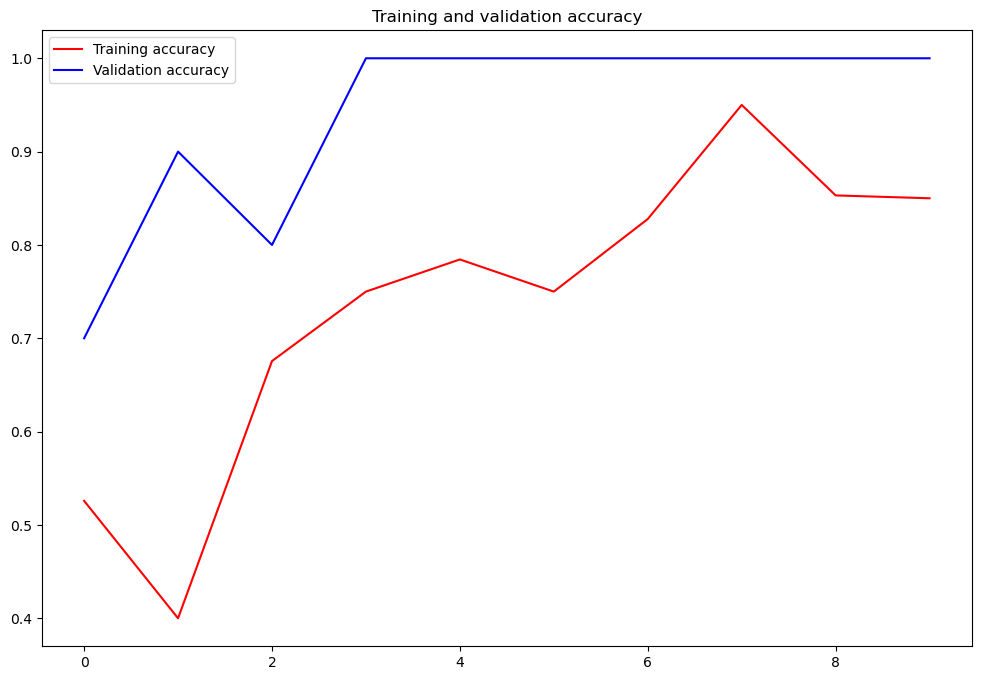

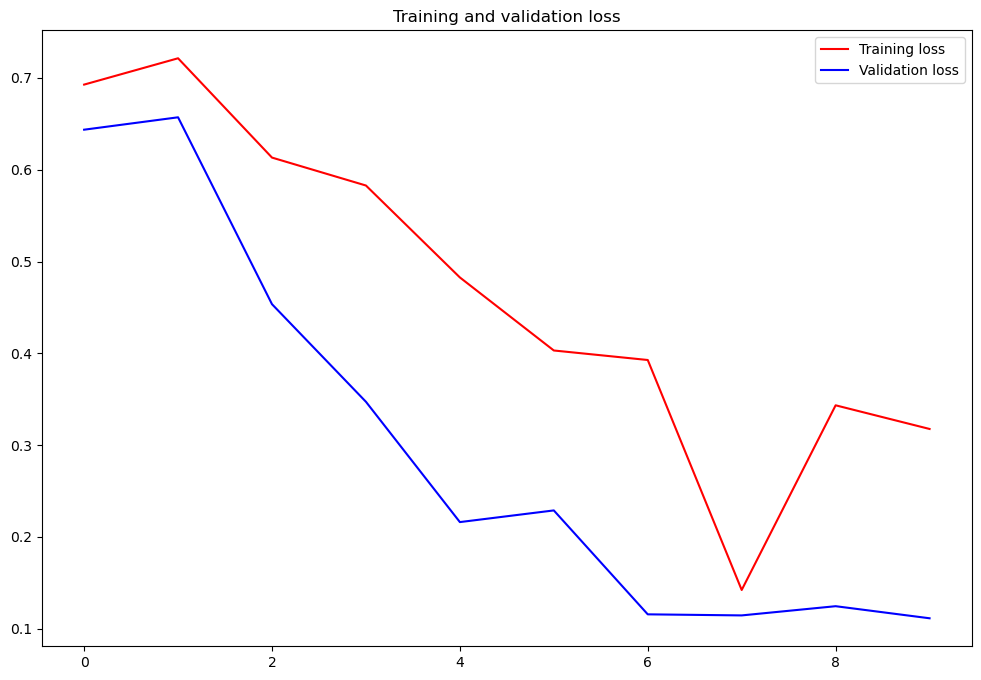

In [7]:
# Plotting the training and validation accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('cancer_classification_model.h5')

# Recompile the model to suppress the warning
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

def predict_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Predict using the model
    prediction = model.predict(img_array)
    print("predictions:",prediction)

    # Output the prediction
    if prediction[0] > 0.5:
        print("The image is predicted to be: Normal")
    else:
        print("The image is predicted to be: Cancer")

# Example usage
image_path = r'C:\Users\K Abhinaya Vamsi\Downloads\cancer-20240611T111705Z-001\cancer\test\Normal\_0_1740.jpeg'
predict_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
predictions: [[0.81730926]]
The image is predicted to be: Normal
